In [18]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import holidays
from datetime import date

twitterdata = pd.read_csv('twittervolume.csv', parse_dates=['ds'])

In [19]:
twitterdata.head()

,ds,y
0,2012-01-02,245887100.0
1,2012-01-03,257617700.0
2,2012-01-04,247368100.0
3,2012-01-05,245796000.0
4,2012-01-06,255773600.0


In [20]:
goodholidays = []
for date, name in sorted(holidays.US(years=2014).items()):
    print(date, name)
    goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


In [21]:
sales = pd.DataFrame(columns=['holiday', 'ds', 'lower_window', 'upper_window'])
sales.head()
for year in range(2014,2021):
    for date, name in sorted(holidays.US(years=year).items()):
        lower_window = 0
        upper_window = 0
        if name in goodholidays:
            dayoftheweek = date.weekday()
#            print(dayoftheweek)
#            print(date, name)
            if dayoftheweek == 0:
                lower_window = -2
            if dayoftheweek == 1:
                lower_window = -3
            if dayoftheweek == 3:
                upper_window = 3
            if dayoftheweek == 4:
                upper_window = 2
            sales.loc[len(sales)] = [name, date, lower_window, upper_window]

In [22]:
m = Prophet()
m = Prophet(holidays=sales)
m.add_country_holidays(country_name='US')
m.fit(twitterdata)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
future = m.make_future_dataframe(periods=365)

In [24]:
forecast = m.predict(future)

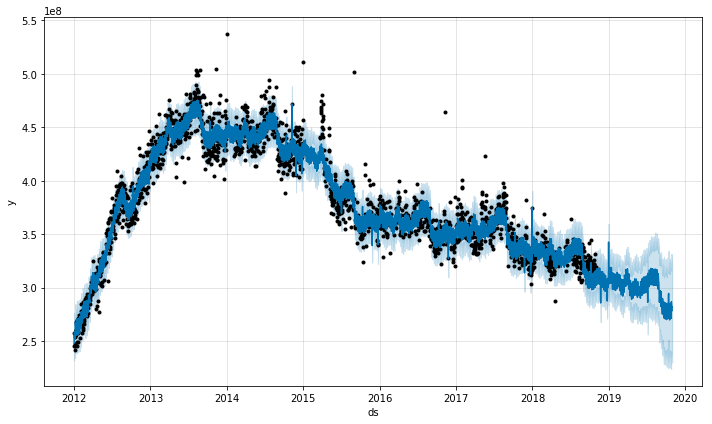

In [25]:
fig1 = m.plot(forecast)

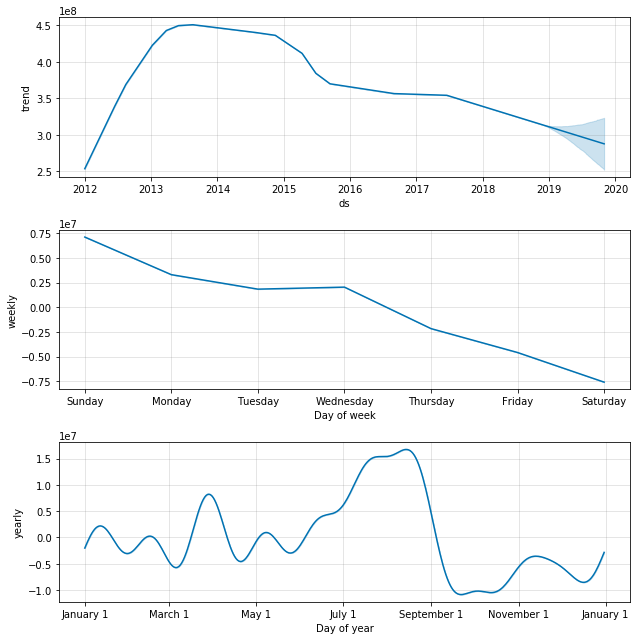

In [11]:
fig2 = m.plot_components(forecast)